In [1]:
import pysm3
import pysm3.units as u
import healpy as hp
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import math
import camb
from camb import model, initialpower
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))
# make sure the version and path is what you expect

Using CAMB 1.5.2 installed at /Users/ikumakiyoshi/.julia/conda/3/lib/python3.10/site-packages/camb


In [2]:
nside = 2**1

In [7]:
# Data m

data_m = pysm3.Sky(nside, preset_strings=["s1","d1"])
data_m = pysm3.Sky(nside, preset_strings=["s1"])

In [8]:
m_40GHz = data_m.get_emission(40 * u.GHz)
m_140GHz = data_m.get_emission(140 * u.GHz)
m_50GHz = data_m.get_emission(50 * u.GHz)
m_100GHz = data_m.get_emission(100 * u.GHz)
m_280GHz = data_m.get_emission(280 * u.GHz)
m_402GHz = data_m.get_emission(402 * u.GHz)

# μK_R to μK_CMB

m_40GHz = m_40GHz.to(u.uK_CMB, equivalencies=u.cmb_equivalencies(40*u.GHz)).value 
m_140GHz = m_140GHz.to(u.uK_CMB, equivalencies=u.cmb_equivalencies(140*u.GHz)).value 
m_50GHz = m_50GHz.to(u.uK_CMB, equivalencies=u.cmb_equivalencies(50*u.GHz)).value 
m_100GHz = m_100GHz.to(u.uK_CMB, equivalencies=u.cmb_equivalencies(100*u.GHz)).value 
m_280GHz = m_280GHz.to(u.uK_CMB, equivalencies=u.cmb_equivalencies(280*u.GHz)).value 
m_402GHz = m_402GHz.to(u.uK_CMB, equivalencies=u.cmb_equivalencies(402*u.GHz)).value

In [9]:
none = 0*m_402GHz 

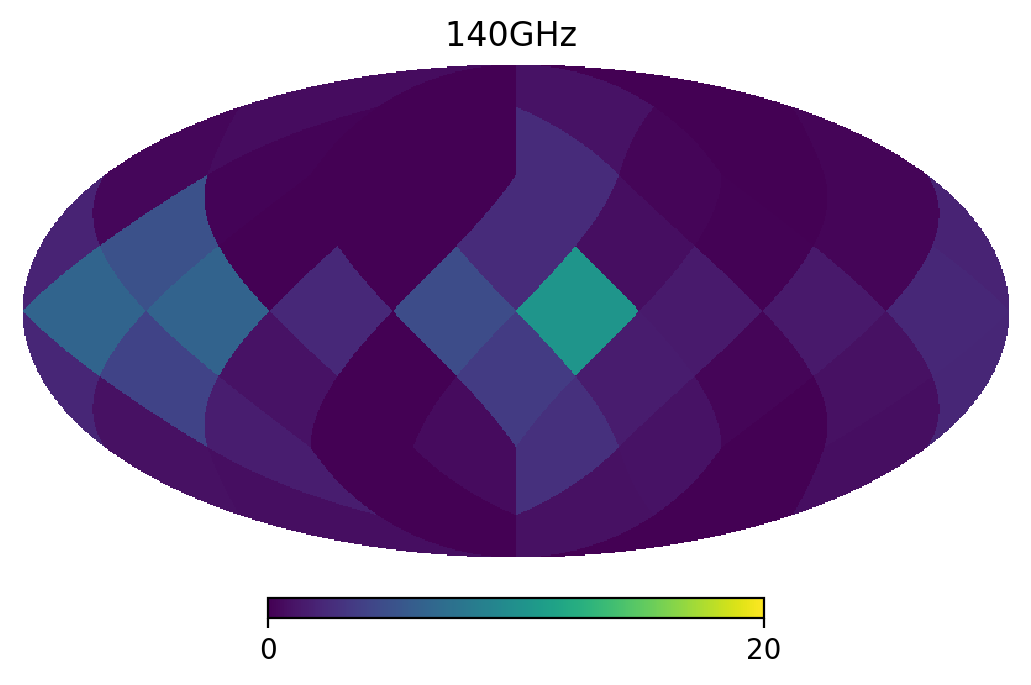

In [20]:
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt

hp.mollview(m_50GHz[1], title="140GHz ", min = 0., max = 20, hold=True)

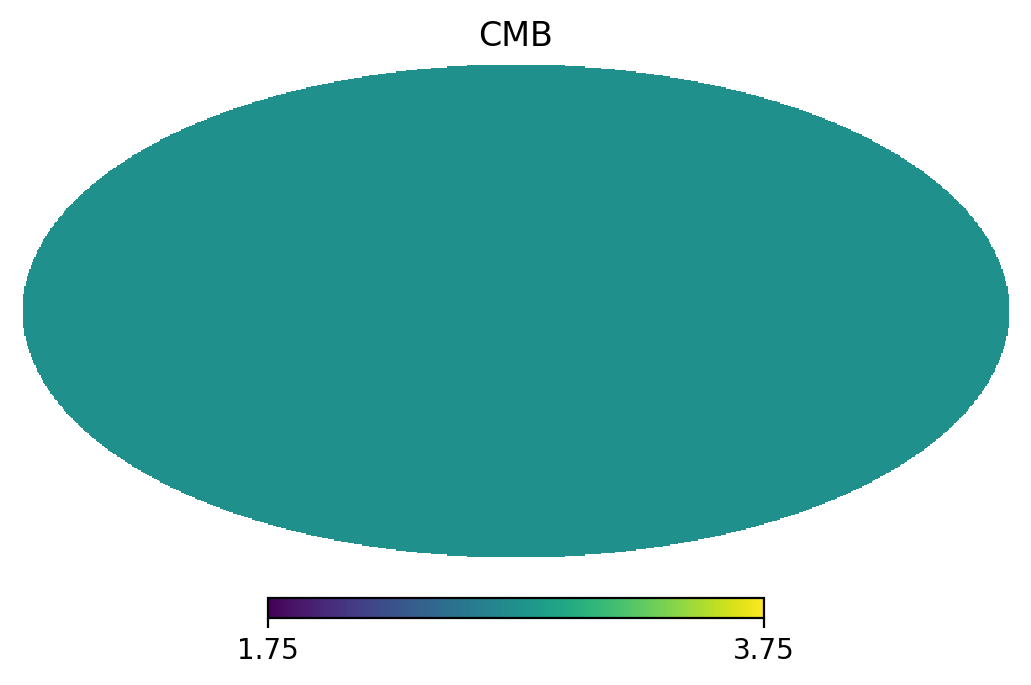

In [23]:
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt

hp.mollview(m_50GHz[1]*0 + 2.75, title="CMB", hold=True)

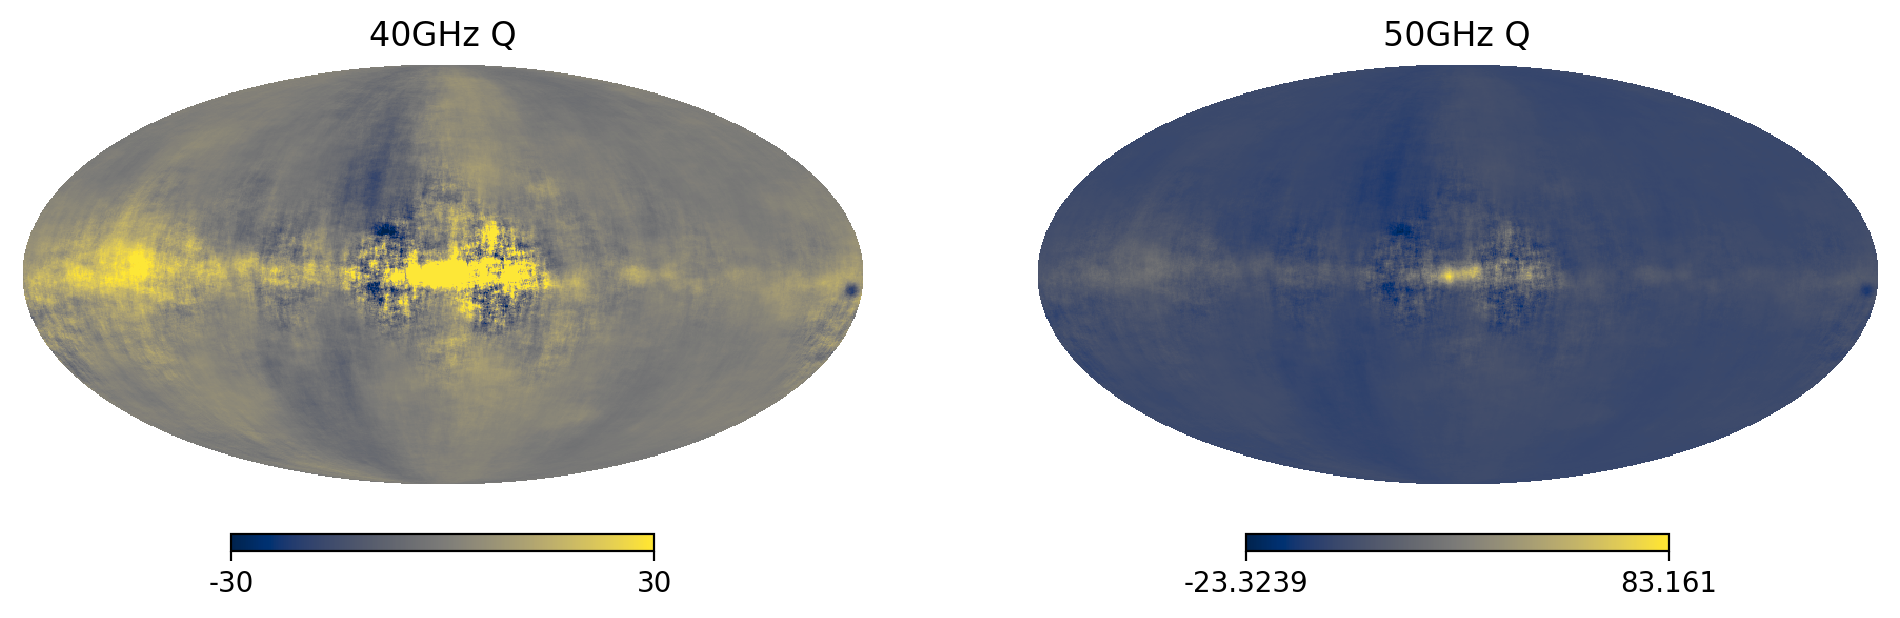

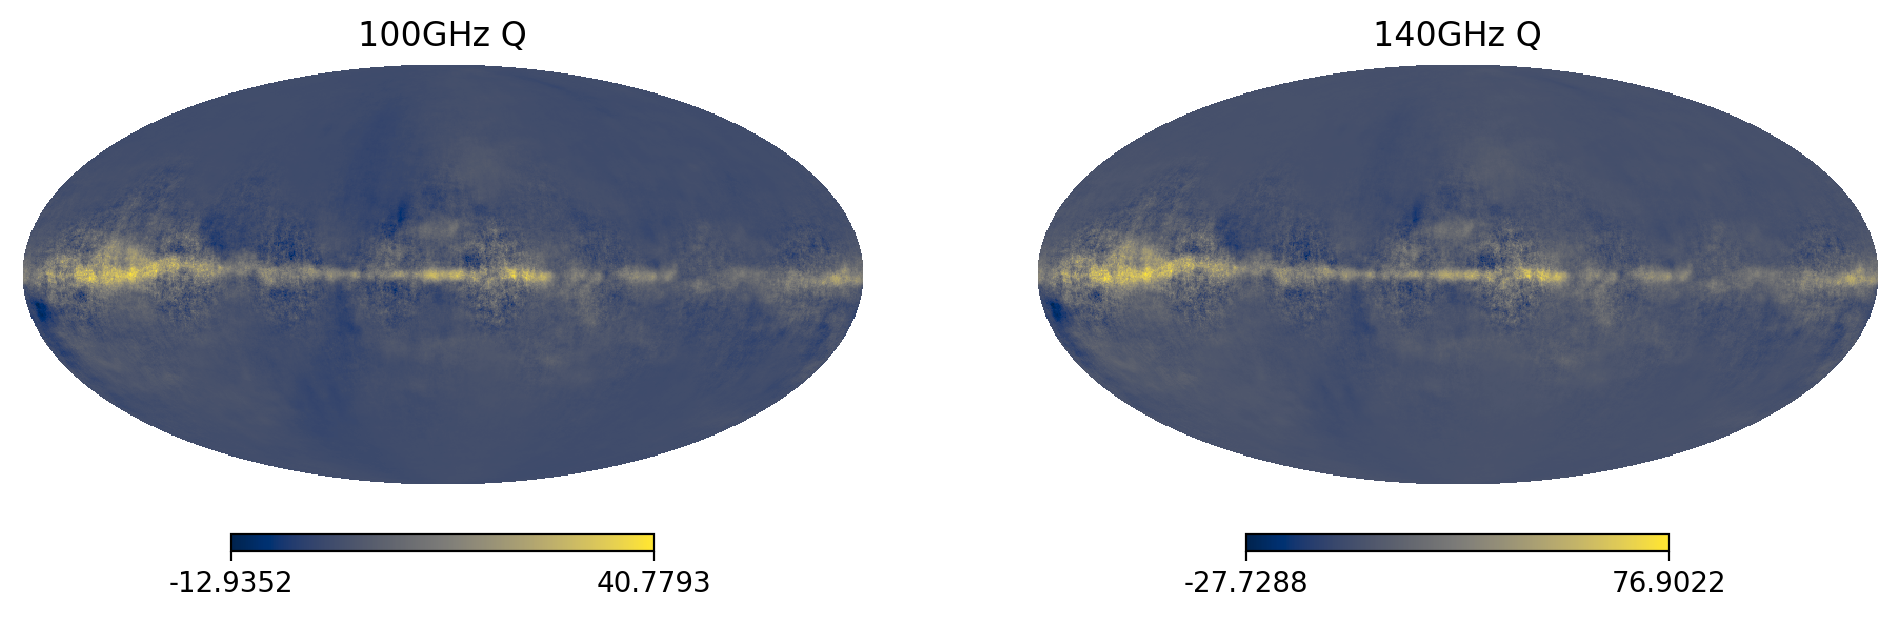

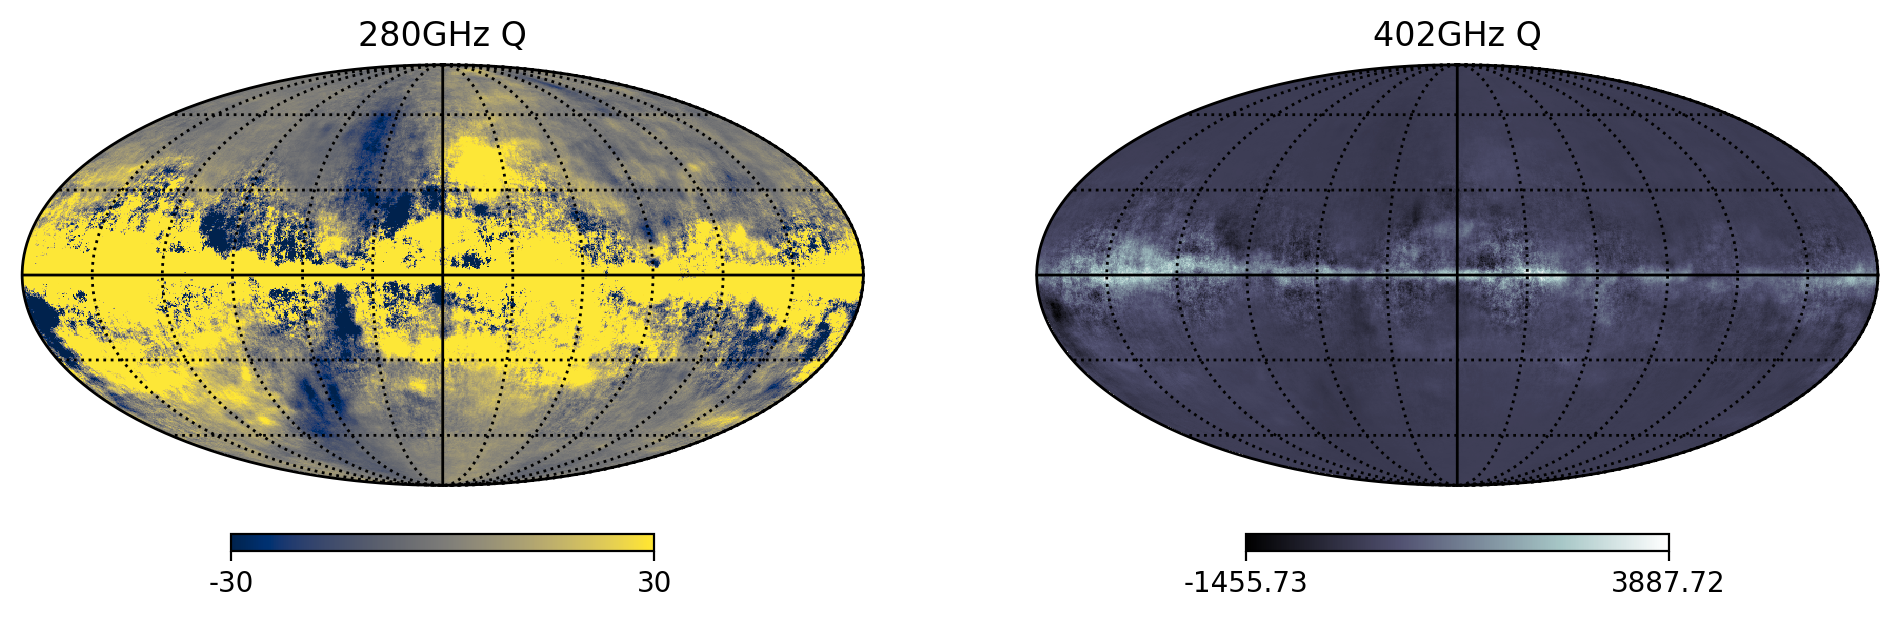

In [35]:
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

plt.axes(ax1)
hp.mollview(m_40GHz[1], title="40GHz Q", cmap='cividis', min = -30, max = 30, hold=True)

plt.axes(ax2)
hp.mollview(m_50GHz[1], title="50GHz Q", cmap='cividis', hold=True)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

plt.axes(ax1)
hp.mollview(m_100GHz[1], title="100GHz Q", cmap='cividis',hold=True)

plt.axes(ax2)
hp.mollview(m_140GHz[1], title="140GHz Q", cmap='cividis',hold=True)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

plt.axes(ax1)
hp.mollview(m_280GHz[1], title="280GHz Q", cmap='cividis', min = -30, max = 30, hold=True)

plt.axes(ax2)

hp.mollview(m_402GHz[1], title="402GHz Q", cmap='bone', hold=True)

hp.graticule()

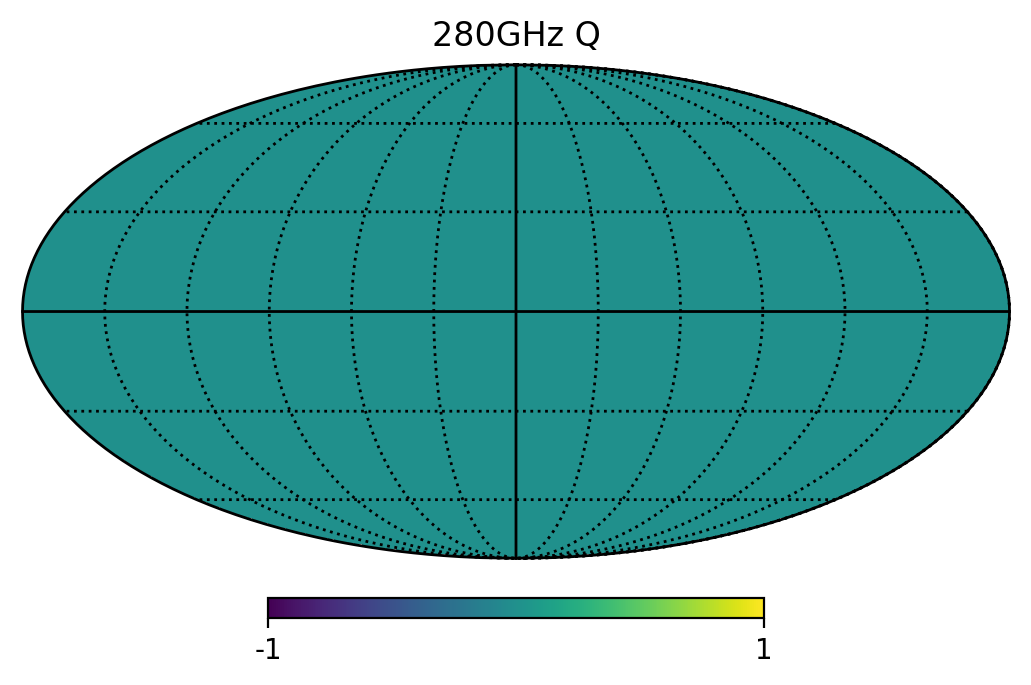

In [17]:
hp.mollview(none[0], title="280GHz Q", hold=True)

hp.graticule()

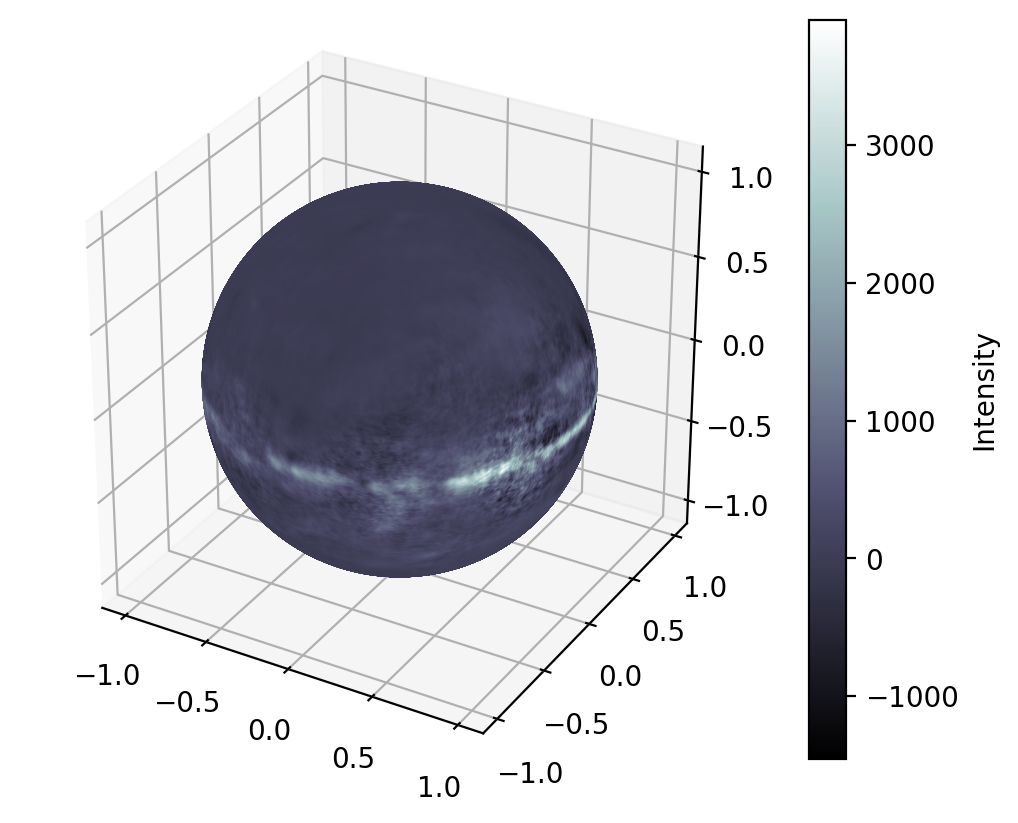

In [8]:
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Set the Healpix parameters (NSIDE)
nside = hp.get_nside(m_402GHz[1])

# Generate the spherical coordinates from the Healpix pixels
theta, phi = hp.pix2ang(nside, np.arange(hp.nside2npix(nside)))

# Convert spherical coordinates to Cartesian coordinates
x = np.sin(theta) * np.cos(phi)
y = np.sin(theta) * np.sin(phi)
z = np.cos(theta)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data on the 3D sphere
sc = ax.scatter(x, y, z, c=m_402GHz[1], cmap='bone', s=10)

# Set the aspect ratio to be equal
ax.set_box_aspect([1, 1, 1])

# Add a colorbar
cb = fig.colorbar(sc, ax=ax)
cb.set_label('Intensity')

ax.grid()

plt.show()

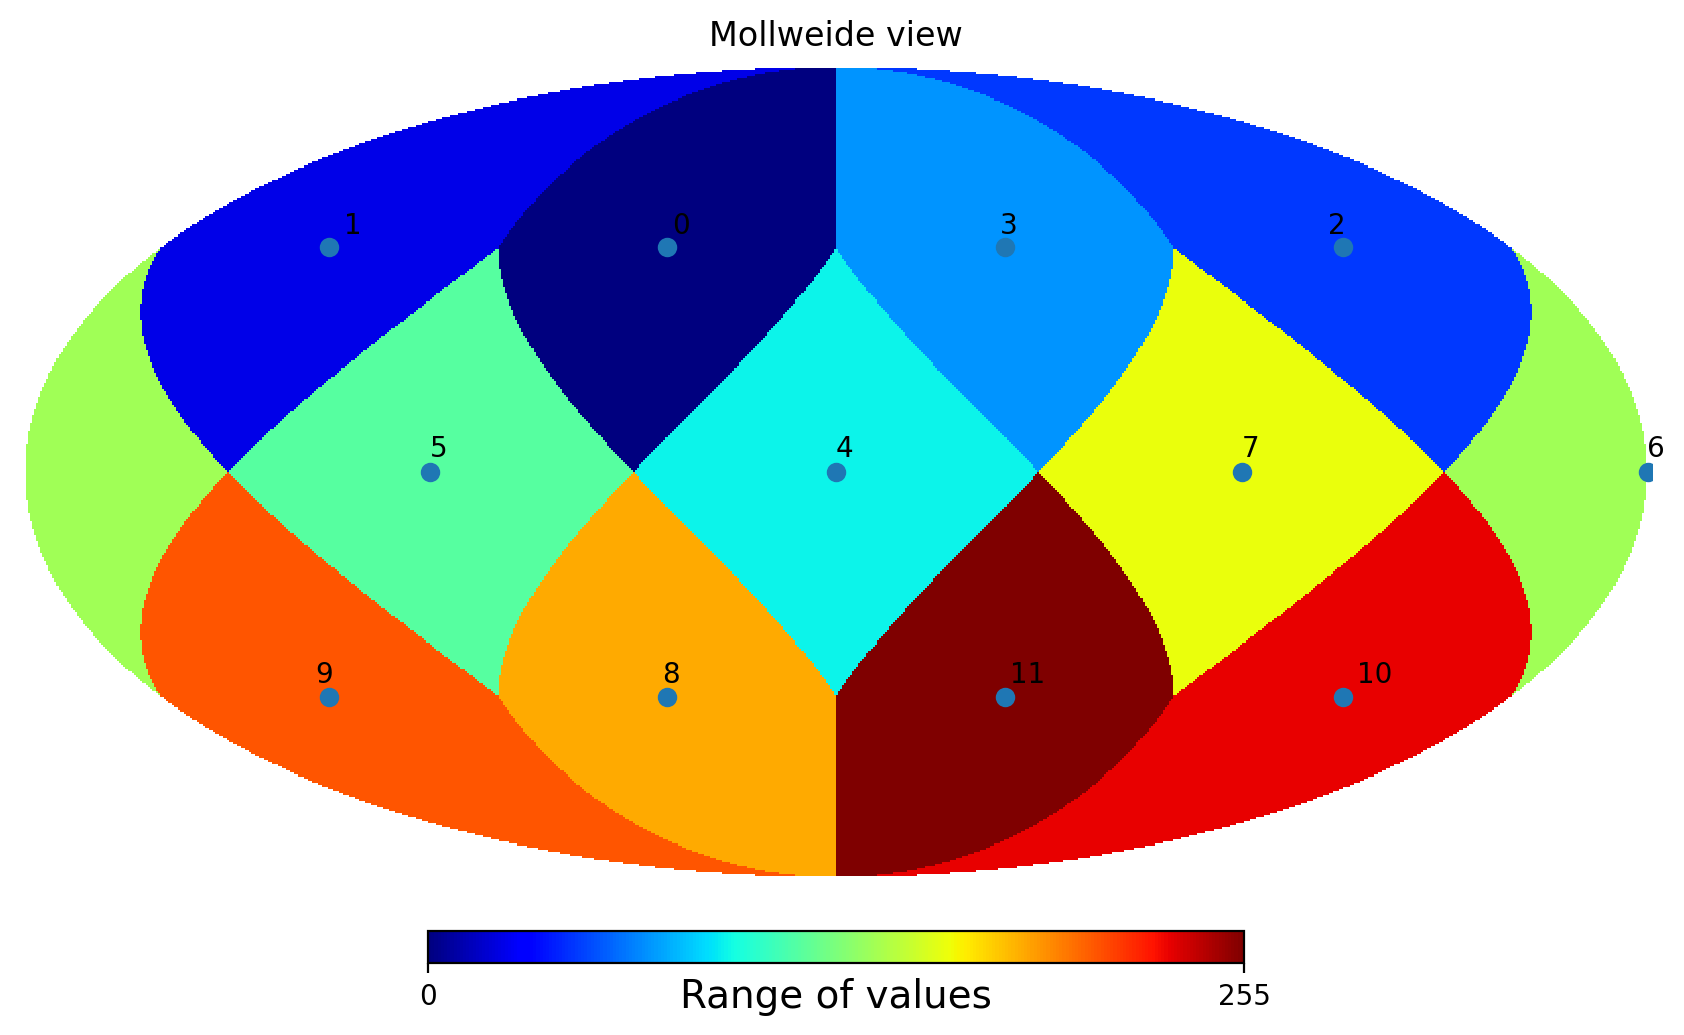

In [29]:
NSIDE = 1
npixels = hp.nside2npix(NSIDE)
img = np.linspace(0, 255, num=npixels)
index = np.arange(npixels)
theta, phi= hp.pix2ang(NSIDE,index)
hp.mollview(img, min=0, max = 255, cmap='jet', unit='Range of values')
hp.projscatter(theta, phi)
for i in index:
    hp.projtext(theta[i]-0.05, phi[i], i)